# Regression in Scikit-learn

In [247]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# other
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [248]:
# import dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [249]:
df_linear = df[['age', 'fare']]

In [250]:
df_linear.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [251]:
# Simple Linear Regression
x = df_linear[['age']]
y = df_linear['fare']

In [252]:
x.isnull().sum() / len(x)*100

age    19.86532
dtype: float64

In [253]:
x['age'].fillna(x['age'].mean(), inplace=True)

C:\Users\KING\AppData\Local\Temp\ipykernel_17216\1291861742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(), inplace=True)
C:\Users\KING\AppData\Local\Temp\ipykernel_17216\1291861742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(x['age'].mean(), inplace=True)


In [254]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [255]:
x.isnull().sum() / len(x)*100

age    0.0
dtype: float64

In [256]:
y.isnull().sum() / len(x)*100

np.float64(0.0)

In [257]:
x.shape

(891, 1)

In [258]:
y.shape

(891,)

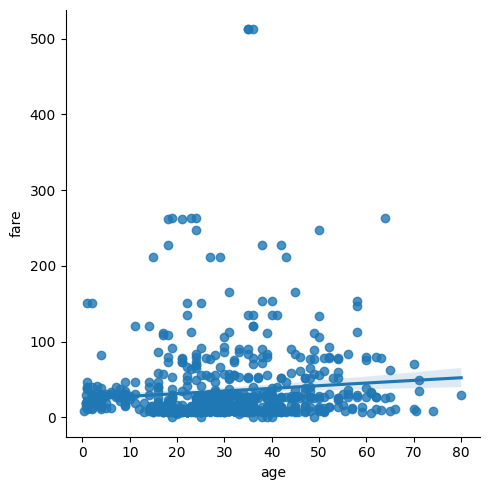

In [259]:
# plot
sns.lmplot(data = df_linear, x='age', y='fare' )

<Axes: ylabel='age'>

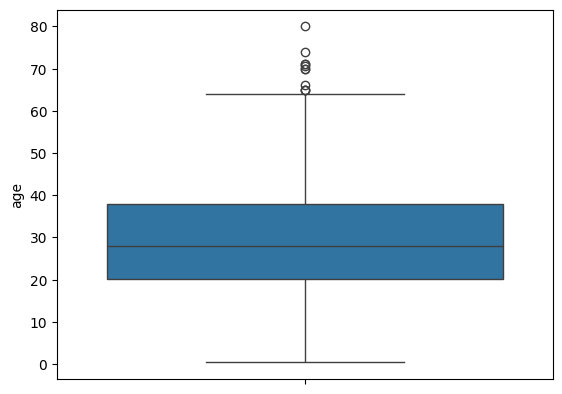

In [260]:
sns.boxplot(data=df_linear, y='age')

In [261]:
df_linear = df_linear[(df_linear['age']>8) & (df['age']<50)]

<Axes: ylabel='age'>

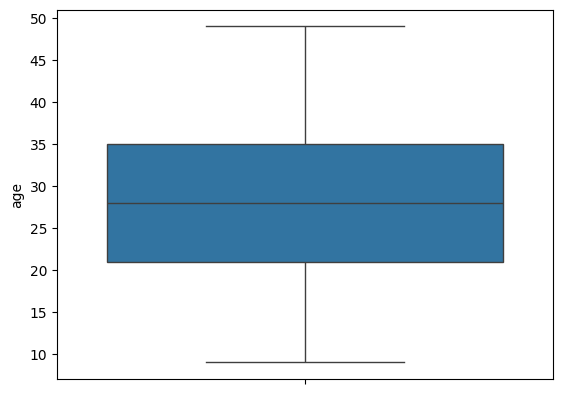

In [262]:
sns.boxplot(data=df_linear, y='age')

<Axes: ylabel='fare'>

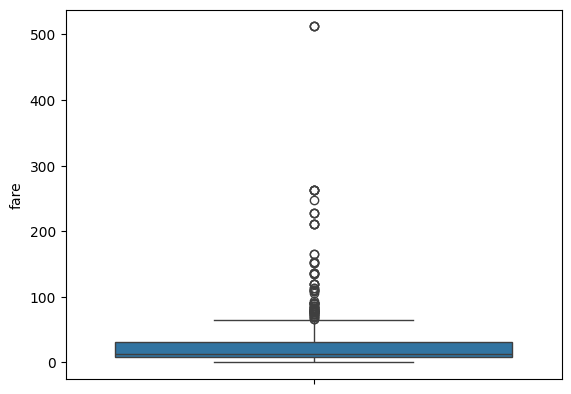

In [263]:
sns.boxplot(data=df_linear, y='fare')

In [264]:
df_linear = df_linear[(df_linear['fare']>1) & (df['fare']<35)]

C:\Users\KING\AppData\Local\Temp\ipykernel_17216\2668823673.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_linear = df_linear[(df_linear['fare']>1) & (df['fare']<35)]


<Axes: ylabel='fare'>

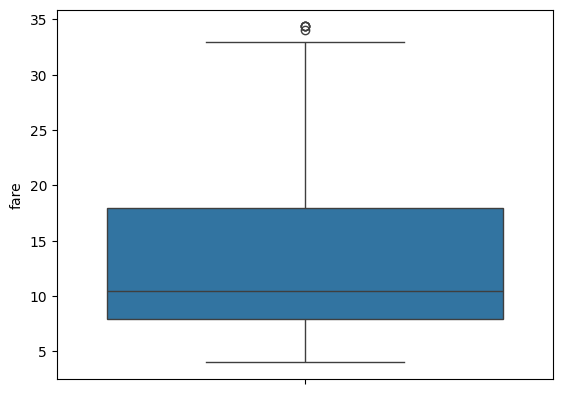

In [265]:
sns.boxplot(data=df_linear, y='fare')

In [266]:
x = df_linear[['age']]
y = df_linear['fare']

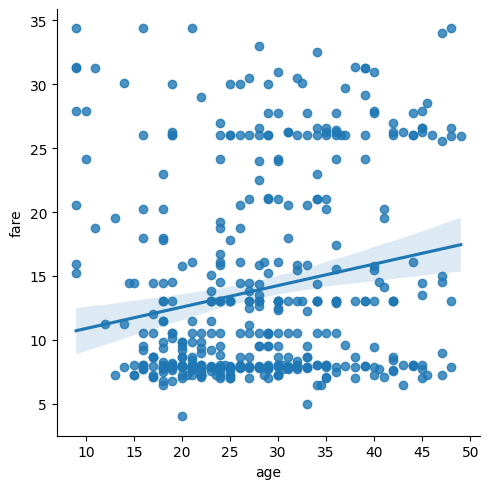

In [267]:
# plot
sns.lmplot(data = df_linear, x='age', y='fare' )

In [268]:
# model
model = LinearRegression()

# train
model.fit(x, y)

LinearRegression()

In [269]:
# predict
model.predict([[22]])

c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.90182175])

In [270]:
# model evaluation with matrics
# r2
# mean squared error
# MAE
# RMSE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# model
model = LinearRegression()

# train
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)


<Axes: xlabel='fare'>

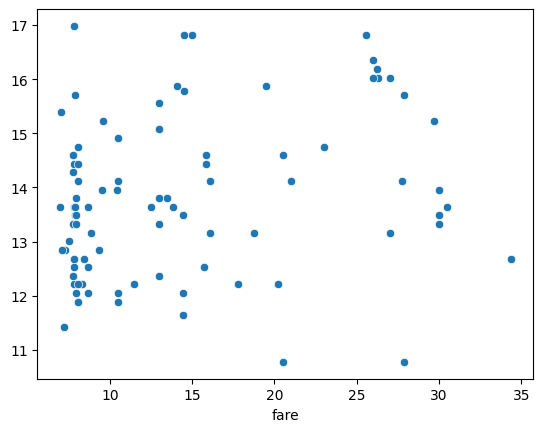

In [271]:
# compare
sns.scatterplot(x=y_test, y = y_pred)

In [272]:
model.score(x_test, y_test)

0.052736774232290395

In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE = mean_absolute_error(y_true=y_test, y_pred = y_pred)
MSE = mean_squared_error(y_true=y_test, y_pred = y_pred)
RMSE = mean_squared_error(y_true=y_test, y_pred = y_pred, squared=False)
R2 = r2_score(y_true=y_test, y_pred=y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R_squared: ", R2)

MAE:  5.90024825143322
MSE:  54.25766756890501
RMSE:  7.365980421431014
R_squared:  0.052736774232290395


c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [279]:
# another method
RMSE = np.sqrt(MSE)
RMSE

np.float64(7.365980421431014)